# Examples of Gaussian Process Regression in High Energy Physics

In [3]:
import ROOT
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RationalQuadratic, RBF, Matern
import numpy as np
from plotting import plot

In [92]:
plot_dir = '../../../CERN/Presentations/Images/' # Set this to None to not save plot images

def save(c, file_name):
    if plot_dir:
        c.Print(plot_dir + file_name)

In [94]:
def canvas():
    c = ROOT.TCanvas('c', '', 1000, 800)
    c.SetFillColor(plot.colors.transparent_white)
    return c

## Dummy Data

In [89]:
### Create example data ###
n = 10
m_min = 500
m_max = 1000

f_true = ROOT.TF1('f', f'[0] * e^(-(x - {m_min}) / [1])', m_min, m_max)
f_true.SetParameters(200, 200)

h_data = ROOT.TH1F('h', '', n, m_min, m_max)
signal_region_bins = [n//2 - 1, n//2] # exclusive top
signal_region_bin_centers = [h_data.GetBinCenter(i) for i in signal_region_bins]

for i in range(1, n+1):
    if i in signal_region_bins: continue
    v = f_true(h_data.GetBinCenter(i))
    e = np.random.normal(scale=1.5 * v**0.5) # add some noise
    h_data.SetBinContent(i, v + e)

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file ../../../CERN/Presentations/Images/gpr_hep_data.pdf has been created


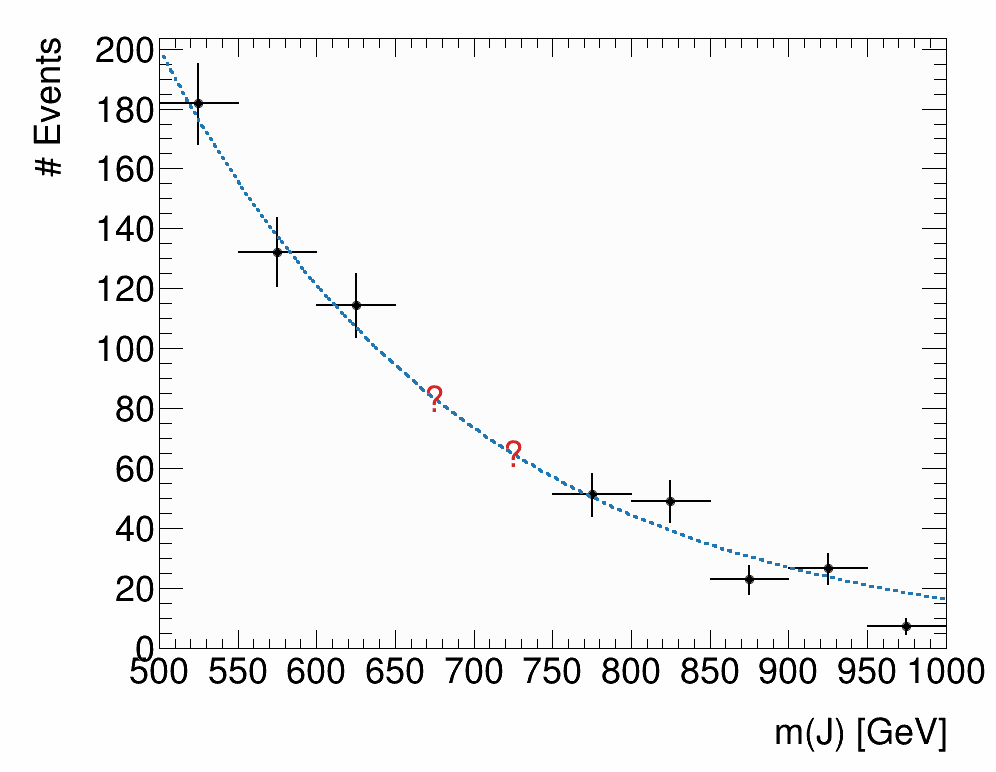

In [99]:
### Plot data ###
c = canvas()
f_true.SetLineColor(plot.colors.blue)
f_true.SetLineStyle(ROOT.kDashed)

plot._plot(c, [h_data, f_true],
    opts=['E', ''],
    xtitle='m(J) [GeV]',
    ytitle='# Events',
)

# Question marks
texts = []
for x in signal_region_bin_centers:
    t = ROOT.TLatex(x, f_true(x), '?')
    t.SetTextColor(plot.colors.red)
    t.SetTextAlign(ROOT.kHAlignCenter + ROOT.kVAlignCenter)
    t.Draw()
    texts.append(t)

# Draw
c.Draw()
save(c, 'gpr_hep_data.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file ../../../CERN/Presentations/Images/gpr_hep_badfuncs.pdf has been created


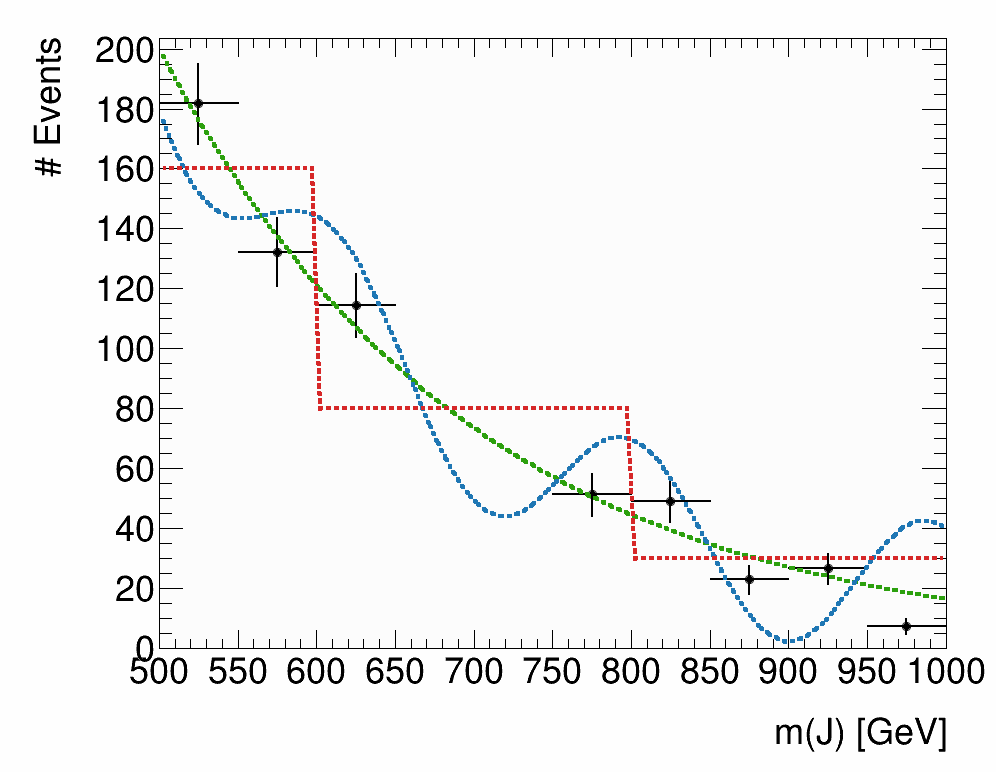

In [114]:
### Bad Functions ###

f_wiggly = ROOT.TF1('f_wiggly', f'[0] * e^(-(x - {m_min}) / [1]) + 25 * sin(x / 30)', m_min, m_max)
f_wiggly.SetParameters(200, 200)

def _step_func(xs, pars):
    x = xs[0]
    if x < 600: return 160
    if x < 800: return 80
    return 30
f_step = ROOT.TF1('f_step', _step_func, m_min, m_max)

c = canvas()
plot._plot(c, [h_data, f_true, f_wiggly, f_step],
    opts=['E', '', '', ''],
    linecolor=[ROOT.kBlack, plot.colors.green, plot.colors.blue, plot.colors.red],
    linestyle=[ROOT.kSolid] + [ROOT.kDashed] * 3,
    linewidth=[2] + [4] * 3,
    xtitle='m(J) [GeV]',
    ytitle='# Events',
)

# Question marks
# texts = []
# for x in signal_region_bin_centers:
#     t = ROOT.TLatex(x, f_true(x), '?')
#     t.SetTextColor(plot.colors.red)
#     t.SetTextAlign(ROOT.kHAlignCenter + ROOT.kVAlignCenter)
#     t.Draw()
#     texts.append(t)

# Draw
c.Draw()
save(c, 'gpr_hep_badfuncs.pdf')


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file ../../../CERN/Presentations/Images/gpr_hep_func-as-points.pdf has been created


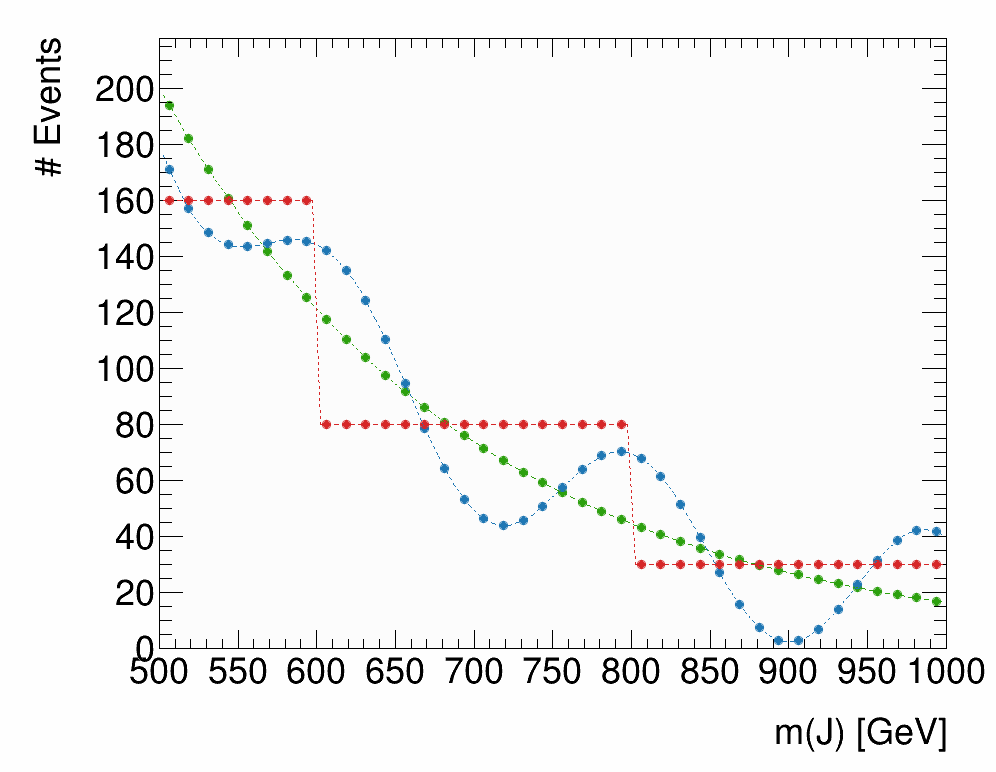

In [123]:
### Functions as Points ###

hists = []
funcs = [f_true, f_wiggly, f_step]
for f in funcs:
    n_step = 40
    h = ROOT.TH1F(f.GetName() + 'h', '', n_step, m_min, m_max)
    for i in range(n_step):
        h.SetBinContent(i+1, f(h.GetBinCenter(i+1)))
    hists.append(h)

c = canvas()
plot._plot(c, hists + funcs,
    opts=['P'] * 3 + [''] * 3,
    markercolor=[plot.colors.green, plot.colors.blue, plot.colors.red] * 2,
    linewidth=1,
    xtitle='m(J) [GeV]',
    ytitle='# Events',
)

# Question marks
# texts = []
# for x in signal_region_bin_centers:
#     t = ROOT.TLatex(x, f_true(x), '?')
#     t.SetTextColor(plot.colors.red)
#     t.SetTextAlign(ROOT.kHAlignCenter + ROOT.kVAlignCenter)
#     t.Draw()
#     texts.append(t)

# Draw
c.Draw()
save(c, 'gpr_hep_func-as-points.pdf')